In [1]:
import cv2
import json
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [12]:
# load json
json_path = '../outputs/combined_detections.json'
with open(json_path, 'r') as f:
    yolo_detections = json.load(f)
    
images = yolo_detections['images']
videos = yolo_detections['videos']

## Check Yolo Output

In [64]:
# Extract a specific frame from a video
def get_frame(
    video_path = str, 
    frame_number = int):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise ValueError(f"Frame number {frame_number} could not be retrieved.")
    return frame
    
def display_yolo_detections(frame_id = str):
    base_filename = frame_id.rsplit('_', 1)[0]
    video_name = f"{base_filename}.MP4"
    video_path = '../../../ProcessedData/videos/' + video_name
    frame_int = int(frame_id.split('_')[-1])
    frame = get_frame(video_path, frame_int)
    # Convert frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Get frame dimensions
    frame_height, frame_width = frame.shape[:2]
    
    # Get detections for the frame
    detections = [image['annotations'] for image in images if image['image_id'] == f'{frame_id}.jpg']

    # Check if detections list is empty or if the first element is empty
    if len(detections) == 0 or len(detections[0]) == 0:
        print(f'No detections found for {frame_id}.jpg')
        # Convert frame back to RGB for display
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_frame)
        plt.axis('off')
        plt.show()
        return
    
    for detection in detections[0]:
        cls = detection['class']
        bbox = detection['bbox']
        confidence = detection['confidence']
        
        x_center, y_center, width, height = bbox
        # Convert normalized coordinates to pixel values
        x1 = int((x_center - width / 2) * frame_width)
        y1 = int((y_center - height / 2) * frame_height)
        x2 = int((x_center + width / 2) * frame_width)
        y2 = int((y_center + height / 2) * frame_height)
    
        # Draw bounding boxes on the frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 139), 5)
        
        label = f"person: {confidence:.2f}"
        print(label)
        cv2.putText(frame, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 139), 5)
        
    # Convert frame back to RGB for display
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_frame)
    plt.axis('off')
    plt.show()

No detections found for quantex_at_home_id254922_2022_04_12_01_003900.jpg


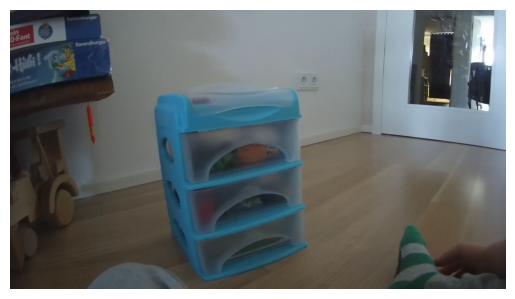

In [69]:
display_yolo_detections('quantex_at_home_id254922_2022_04_12_01_003900')

## Run Yolo on single frame

In [28]:
model = YOLO('../../../models/yolov8_trained.pt')
# Extract a specific frame from a video
def get_frame(
    video_path = str, 
    frame_number = int):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise ValueError(f"Frame number {frame_number} could not be retrieved.")
    return frame
    
def display_yolo_detections(frame_id = str):
    base_filename = frame_id.rsplit('_', 1)[0]
    video_name = f"{base_filename}.MP4"
    video_path = '../../../ProcessedData/videos/' + video_name
    frame_int = int(frame_id.split('_')[-1])
    frame = get_frame(video_path, frame_int)
    # Convert frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Get frame dimensions
    frame_height, frame_width = frame.shape[:2]
    
    # Get detections for the frame
    detections = model(frame, iou=0.4)
    #TODO: iou=0.4 or or 0.35

    # Check if detections list is empty or if the first element is empty
    if len(detections[0]) == 0 or len(detections[0].boxes) == 0:
        print(f'No detections found for {frame_id}.jpg')
        # Convert frame back to RGB for display
        plt.figure(figsize=(20, 16))
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_frame)
        plt.axis('off')
        plt.show()
        return
    
    # Add the annotations for the detected objects
    for boxes in detections[0].boxes:
        # Get the bounding box coordinates (x center, y center, width, height) normalized to the image size
        x_center, y_center, width, height = boxes.xywhn[0]
        confidence = boxes.conf[0]
        # Get the category ID and name
        # Convert normalized coordinates to pixel values
        x1 = int((x_center - width / 2) * frame_width)
        y1 = int((y_center - height / 2) * frame_height)
        x2 = int((x_center + width / 2) * frame_width)
        y2 = int((y_center + height / 2) * frame_height)
    
        # Draw bounding boxes on the frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 139), 5)
        
        label = f"person: {confidence:.2f}"
        print(label)
        cv2.putText(frame, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 139), 5)
        
    # Convert frame back to RGB for display
    plt.figure(figsize=(20, 16))
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_frame)
    plt.axis('off')
    plt.show()


0: 384x640 4 persons, 23.0ms
Speed: 4.6ms preprocess, 23.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
person: 0.90
person: 0.64
person: 0.46
person: 0.28


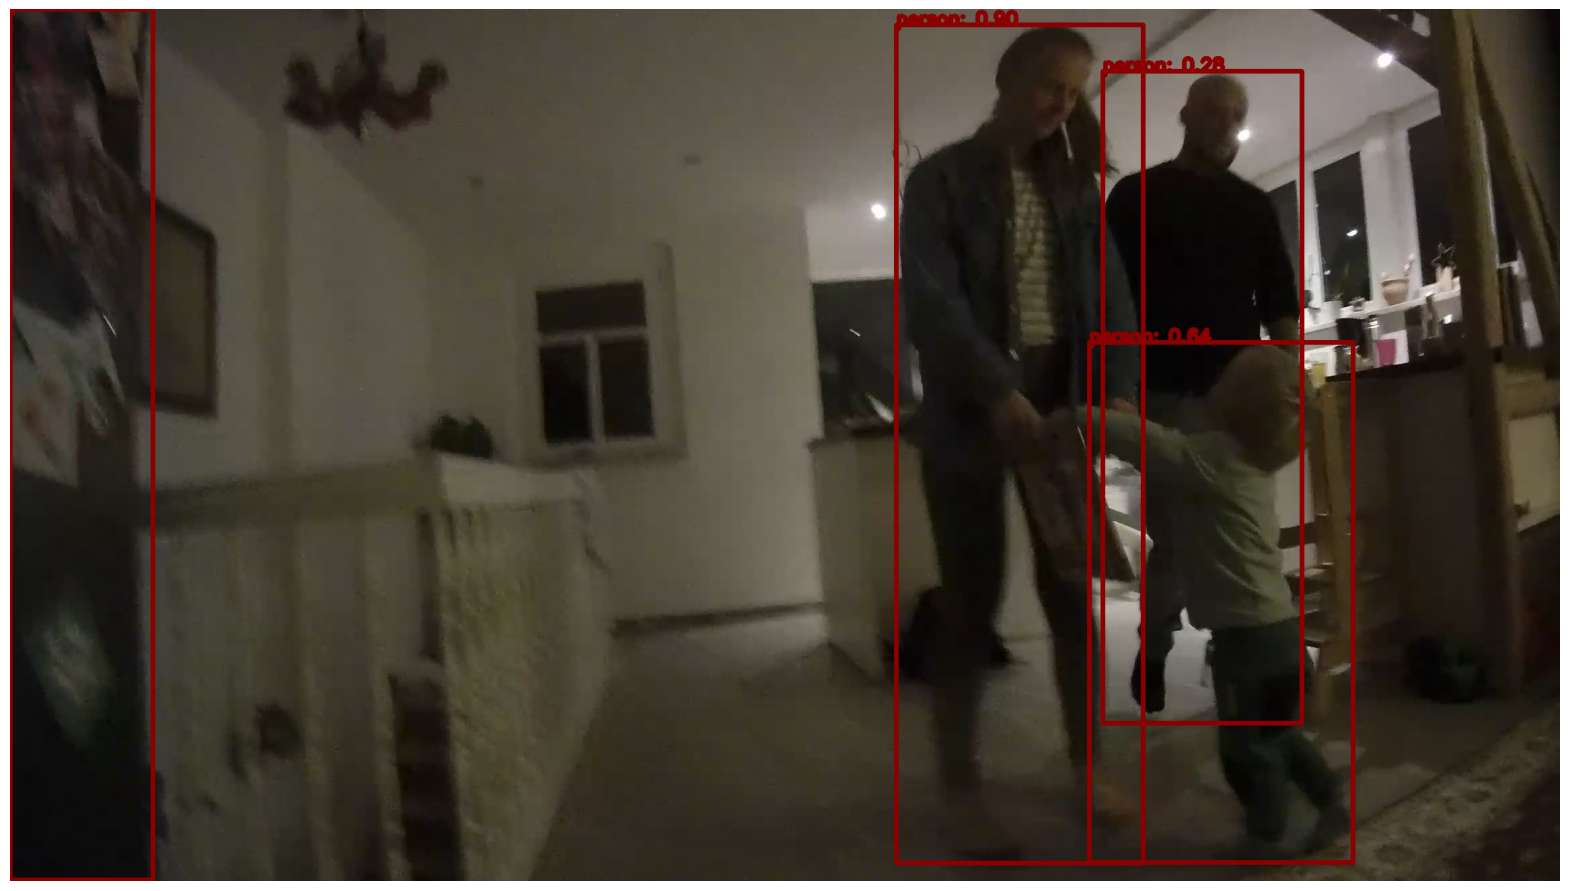

In [29]:
display_yolo_detections('quantex_at_home_id268898_2022_12_15_02_004740')